<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/Predicting_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Import

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report




## Data Preparation

In [35]:
# Download the “Heart Disease UCI” dataset.

from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp/heart_disease_uci.csv')

df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**trestbps** stands for Resting Blood Pressure (measured in mm Hg)

**cp** stands for Chest Pain Type. It describes the type of chest pain experienced by a patient.

The values for cp are typically:
1️⃣ 1 — Typical angina (chest pain related to decreased blood supply to the heart)
2️⃣ 2 — Atypical angina (chest pain not related to heart disease)
3️⃣ 3 — Non-anginal pain (chest pain due to other causes)
4️⃣ 4 — Asymptomatic (no chest pain, but heart disease may still be present)

* chol: Serum cholesterol (mg/dL)
* fbs: Fasting blood sugar > 120 mg/dL (1 = true, 0 = false)
* restecg: Resting electrocardiographic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hypertrophy)
* thalch: Maximum heart rate achieved
* exang: Exercise-induced angina (1 = yes, 0 = no)
* oldpeak: ST depression induced by exercise relative to rest
slope: Slope of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping)
* ca: Number of major vessels (0–3) colored by fluoroscopy
* thal: Thalassemia (1 = normal, 2 = fixed defect, 3 = reversible defect)

In [100]:
# Preprocess the data: handle missing values if any, encode categorical variables, and scale the features.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [138]:
df.isna().mean().sort_values(ascending=False)

,0
ca,0.664130
fbs,0.097826
oldpeak,0.067391
trestbps,0.064130
thalch,0.059783
exang,0.059783
chol,0.032609
age,0.000000
restecg_normal,0.000000
thal_normal,0.000000


In [101]:
missing_data=df.isnull().sum()
print(missing_data)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [102]:
df=df.drop_duplicates()
print(df.duplicated().sum())

0


In [104]:
df=df.drop('id',axis=1)

In [105]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [106]:
#convert TRUE and FALSE
df['fbs'] = df['fbs'].map({True: 1, False: 0})
df['exang'] = df['exang'].map({True: 1, False: 0})

df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,1.0,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,0.0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,0.0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,0.0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,0.0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0


In [107]:
#apply one hot encoding to categorical columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'])
df.head()

,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,Male,Cleveland,145.0,233.0,1.0,150.0,0.0,2.3,0.0,...,True,True,False,False,True,False,False,True,False,False
1,67,Male,Cleveland,160.0,286.0,0.0,108.0,1.0,1.5,3.0,...,False,True,False,False,False,True,False,False,True,False
2,67,Male,Cleveland,120.0,229.0,0.0,129.0,1.0,2.6,2.0,...,False,True,False,False,False,True,False,False,False,True
3,37,Male,Cleveland,130.0,250.0,0.0,187.0,0.0,3.5,0.0,...,False,False,True,False,True,False,False,False,True,False
4,41,Female,Cleveland,130.0,204.0,0.0,172.0,0.0,1.4,0.0,...,False,True,False,False,False,False,True,False,True,False


In [108]:
#replace all FALSE with 0 and TRUE with 1
df = df.replace({False: 0, True: 1})
df.head()

<ipython-input-108-c3d52ee3d2a6>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({False: 0, True: 1})


,age,sex,dataset,trestbps,chol,fbs,thalch,exang,oldpeak,ca,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,Male,Cleveland,145.0,233.0,1.0,150.0,0.0,2.3,0.0,...,1,1,0,0,1,0,0,1,0,0
1,67,Male,Cleveland,160.0,286.0,0.0,108.0,1.0,1.5,3.0,...,0,1,0,0,0,1,0,0,1,0
2,67,Male,Cleveland,120.0,229.0,0.0,129.0,1.0,2.6,2.0,...,0,1,0,0,0,1,0,0,0,1
3,37,Male,Cleveland,130.0,250.0,0.0,187.0,0.0,3.5,0.0,...,0,0,1,0,1,0,0,0,1,0
4,41,Female,Cleveland,130.0,204.0,0.0,172.0,0.0,1.4,0.0,...,0,1,0,0,0,0,1,0,1,0


In [109]:
numerical_data= df.select_dtypes(include=['int64', 'float64'])
numerical_data.head()


,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num,cp_asymptomatic,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,...,1,1,0,0,1,0,0,1,0,0
1,67,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,1,...,0,1,0,0,0,1,0,0,1,0
2,67,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,37,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,41,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       920 non-null    int64  
 1   sex                       920 non-null    object 
 2   dataset                   920 non-null    object 
 3   trestbps                  861 non-null    float64
 4   chol                      890 non-null    float64
 5   fbs                       830 non-null    float64
 6   thalch                    865 non-null    float64
 7   exang                     865 non-null    float64
 8   oldpeak                   858 non-null    float64
 9   ca                        309 non-null    float64
 10  num                       920 non-null    int64  
 11  cp_asymptomatic           920 non-null    int64  
 12  cp_atypical angina        920 non-null    int64  
 13  cp_non-anginal            920 non-null    int64  
 14  cp_typical

In [111]:
#correlation of numerical_data with num
correlation = numerical_data.corrwith(numerical_data['num'])
print(correlation)

age                         0.339596
trestbps                    0.122291
chol                       -0.231547
fbs                         0.155533
thalch                     -0.366265
exang                       0.388408
oldpeak                     0.443084
ca                          0.516216
num                         1.000000
cp_asymptomatic             0.424172
cp_atypical angina         -0.343266
cp_non-anginal             -0.156050
cp_typical angina          -0.055896
restecg_lv hypertrophy      0.075099
restecg_normal             -0.168173
restecg_st-t abnormality    0.131698
slope_downsloping           0.178142
slope_flat                  0.242790
slope_upsloping            -0.142565
thal_fixed defect           0.105679
thal_normal                -0.216512
thal_reversable defect      0.278313
dtype: float64


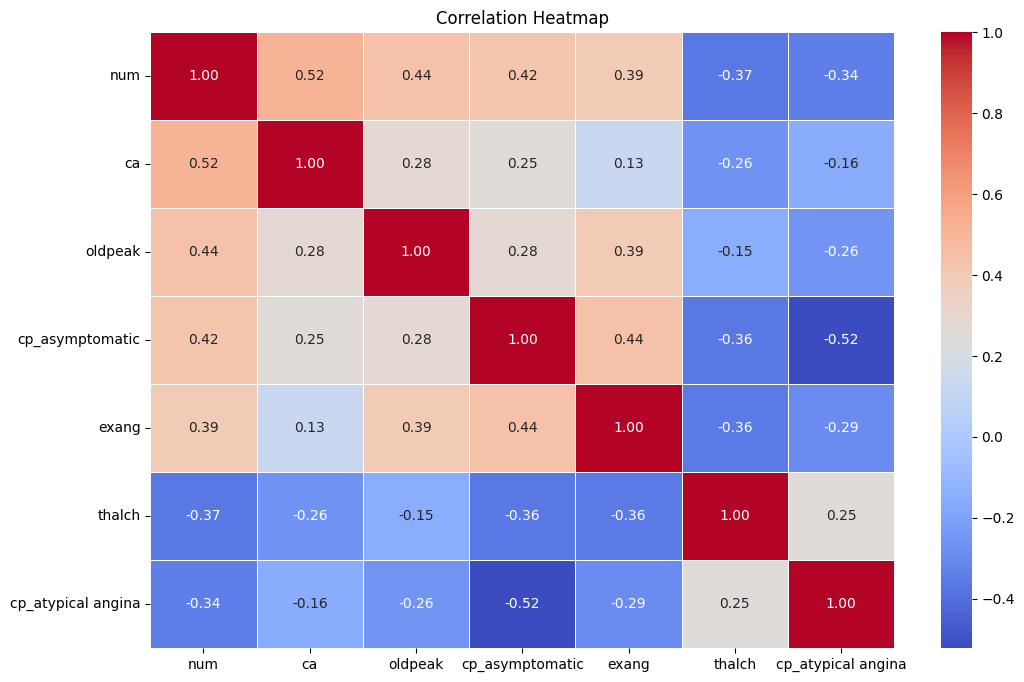

In [114]:
# only numeric
numerical_data_updated = numerical_data.select_dtypes(include=['number'])


columns_to_keep = ['num', 'ca', 'oldpeak', 'cp_asymptomatic', 'exang', 'thalch', 'cp_atypical angina']
existing_columns = [col for col in columns_to_keep if col in numerical_data_updated.columns]

numerical_data_cleaned = numerical_data_updated[existing_columns]

# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [115]:
#check if columns to keep have NA
numerical_data_cleaned.isna().sum()

,0
num,0
ca,611
oldpeak,62
cp_asymptomatic,0
exang,55
thalch,55
cp_atypical angina,0


PCA





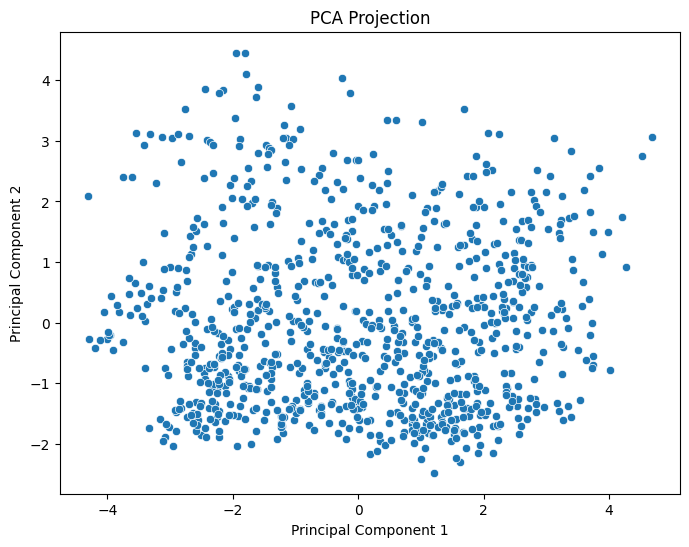

In [131]:
# Select only numerical columns
numerical_data = df.select_dtypes(include=['number'])

# Handle missing values (replace NaN with column mean)
imputer = SimpleImputer(strategy='mean')
features_imputed_df = pd.DataFrame(features_imputed, columns=numerical_data_cleaned.columns)

# Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [133]:
print(pca_df.head())

        PC1       PC2
0  0.464395  3.333940
1  3.062878  2.423883
2  3.198359  1.480548
3 -2.069372  0.446193
4 -3.224924  2.311241


In [135]:
loadings = pd.DataFrame(pca.components_, columns=features_imputed_df.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(loadings)


          age  trestbps      chol       fbs    thalch     exang   oldpeak  \
PC1  0.249998  0.124272 -0.102242  0.100639 -0.306649  0.327335  0.299293   
PC2  0.237506  0.145209  0.149854  0.183673  0.171784 -0.075688  0.089399   

           ca       num  cp_asymptomatic  ...  cp_typical angina  \
PC1  0.179746  0.373141         0.352108  ...          -0.041654   
PC2  0.061942  0.050908        -0.120824  ...           0.163227   

     restecg_lv hypertrophy  restecg_normal  restecg_st-t abnormality  \
PC1                0.036759       -0.127622                  0.121995   
PC2                0.534736       -0.524466                  0.103756   

     slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
PC1           0.125591    0.240170        -0.188039           0.065491   
PC2           0.056909   -0.079687         0.251917          -0.010346   

     thal_normal  thal_reversable defect  
PC1    -0.203633                0.185616  
PC2     0.300496                0.

In [137]:
loadings = pca.components_

loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=features_imputed_df.columns)

top_7_pc1 = loadings_df['PC1'].abs().sort_values(ascending=False).head(7)

top_7_pc2 = loadings_df['PC2'].abs().sort_values(ascending=False).head(7)
print("Top 7 features contributing to PC1:\n", top_7_pc1)
print("\nTop 7 features contributing to PC2:\n", top_7_pc2)



Top 7 features contributing to PC1:
 num                   0.373141
cp_asymptomatic       0.352108
exang                 0.327335
thalch                0.306649
oldpeak               0.299293
cp_atypical angina    0.260532
age                   0.249998
Name: PC1, dtype: float64

Top 7 features contributing to PC2:
 restecg_lv hypertrophy    0.534736
restecg_normal            0.524466
thal_normal               0.300496
slope_upsloping           0.251917
age                       0.237506
fbs                       0.183673
thalch                    0.171784
Name: PC2, dtype: float64


These features have high contribution to the principal components and are useful for machine learning.
* num (target)
* cp_asymptomatic
* exang
* thalch
* oldpeak
* cp_atypical angina
* age
* restecg_normal
* thal_normal
* slope_upsloping
* fbs
* ca

In [ ]:
'''ca 	0.664130
fbs 	0.097826
oldpeak 	0.067391
trestbps 	0.064130
thalch 	0.059783
exang 	0.059783
chol 	0.03260 - is NULL we have to fill it '''

In [142]:
imputer = SimpleImputer(strategy='mean')
numerical_data_cleaned[['ca', 'oldpeak', 'exang', 'thalch']] = imputer.fit_transform(numerical_data_cleaned[['ca', 'oldpeak', 'exang', 'thalch']])


In [143]:
# droping columns that we are not using to predict num:
columns_to_drop = [
    'sex', 'dataset', 'trestbps', 'chol', 'fbs', 'cp_non-anginal',
    'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
    'restecg_st-t abnormality', 'slope_downsloping', 'slope_flat',
    'slope_upsloping', 'thal_fixed defect', 'thal_normal',
    'thal_reversable defect'
]

df_cleaned = df.drop(columns=columns_to_drop)

print(df_cleaned.head())

   age  thalch  exang  oldpeak   ca  num  cp_asymptomatic  cp_atypical angina
0   63   150.0    0.0      2.3  0.0    0                0                   0
1   67   108.0    1.0      1.5  3.0    2                1                   0
2   67   129.0    1.0      2.6  2.0    1                1                   0
3   37   187.0    0.0      3.5  0.0    0                0                   0
4   41   172.0    0.0      1.4  0.0    0                0                   1


In [149]:
from sklearn.impute import KNNImputer

columns_with_outliers = ['cp_atypical angina', 'ca']

imputer = KNNImputer(n_neighbors=5)
df_cleaned[columns_with_outliers] = imputer.fit_transform(df_cleaned[columns_with_outliers])


columns_to_check = [col for col in df_cleaned.columns if col not in columns_with_outliers]

for col in columns_to_check:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(df_cleaned.shape)

(734, 8)


##Model Training

In [179]:
X = df_cleaned.drop('num', axis=1)
y = df_cleaned['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(587, 7)
(147, 7)
(587,)
(147,)


In [180]:
# Train a logistic regression model on the training set.
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6599
Confusion Matrix:
[[64 13  1]
 [19 29  1]
 [ 7  9  4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        78
           1       0.57      0.59      0.58        49
           2       0.67      0.20      0.31        20

    accuracy                           0.66       147
   macro avg       0.65      0.54      0.55       147
weighted avg       0.66      0.66      0.64       147



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [174]:
print(df['num'].value_counts())


num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64


In [175]:
print(np.unique(y_test, return_counts=True))
print(np.unique(y_train))
print(np.unique(df["num"]))


'''
The train_test_split() function randomly selects a subset of the data for testing. Since classes 3 and 4 have very few samples (3: 107, 4: 28), there is a high chance that all their samples end up in y_train, leaving none for y_test.
'''

(array([0, 1, 2]), array([39, 25, 10]))
[0 1 2]
[0 1 2 3 4]


focus on Recall, becouse for us it is more important to identify as many positive cases as possible (people who actually have heart disease), even if it means incorrectly diagnosing some people who do not have heart disease

In [188]:
# Train Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost
xgb_model = XGBClassifier(scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1]), random_state=42)
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:58:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [189]:
models = {'Logistic Regression': lr_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        78
           1       0.50      0.37      0.42        49
           2       0.27      0.50      0.35        20

    accuracy                           0.58       147
   macro avg       0.51      0.53      0.51       147
weighted avg       0.61      0.58      0.59       147

Confusion Matrix:
 [[57 11 10]
 [14 18 17]
 [ 3  7 10]]

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        78
           1       0.52      0.57      0.54        49
           2       0.50      0.30      0.38        20

    accuracy                           0.64       147
   macro avg       0.59      0.55      0.56       147
weighted avg       0.63      0.64      0.63       147

Confusion Matrix:
 [[60 16  2]
 [17 28  4]
 [ 4 10  6]]

XGBoost Classification Report:

         

In [ ]:
'''In conclusion,as we can see,RF  was chosen because it provided the highest recall among the models tested, making it the best choice for minimizing false negatives in the classification task. '''

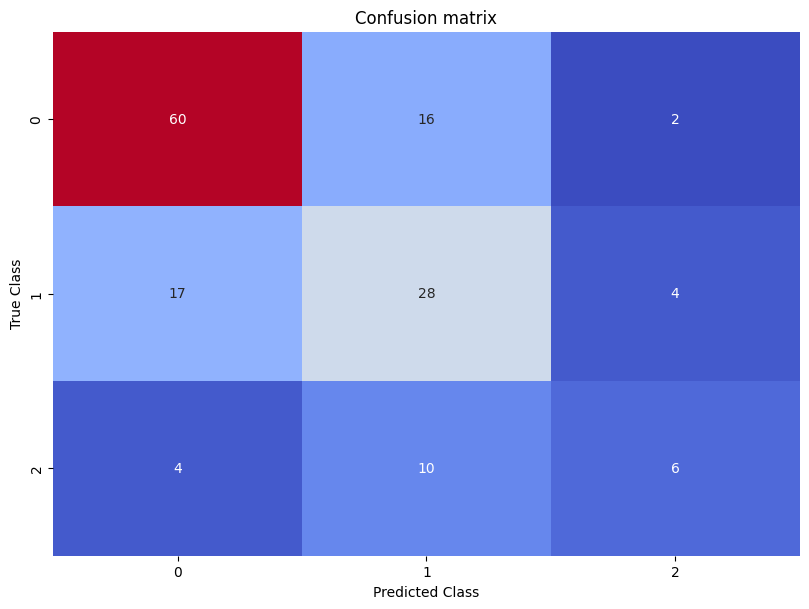

In [195]:
class_names = ['0', '1', '2']

matrix_rf = confusion_matrix(y_test, y_pred_rf)

df_rf = pd.DataFrame(matrix_rf, index=class_names, columns=class_names)

plt.figure(figsize=(8, 6))
sns.heatmap(df_rf, annot=True, cbar=None, cmap="coolwarm", fmt='g')

plt.title("Confusion matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()